<a href="https://colab.research.google.com/github/hardikdhamija96/YuluCaseStudy/blob/main/YuluCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔷 Mindset & Case Introduction

Evaluation will be kept lenient — so make sure you attempt the full case study.  
There is no one right answer. This is an opportunity to **get comfortable with uncertainty**, just like in real-world business analytics.

---

## 🔷 Problem Statement

Yulu is India’s leading micro-mobility service provider that offers electric bikes for shared, solo, and sustainable commuting.  
Yulu Zones are located at metro stations, offices, residential hubs — ensuring **first- and last-mile convenience**.

🔻 **Current Challenge**:  
Yulu has reported a **dip in revenues** and has hired a consulting firm to analyze:

- 🔸 **Which variables significantly affect electric bike demand?**  
- 🔸 **How well do those variables explain the variation in usage?**

---

## 🔷 Objective

As a data analyst, your job is to support Yulu’s decision-making by:

- 🔹 Identifying key demand drivers
- 🔹 Performing statistical testing to validate patterns
- 🔹 Translating insights into **practical, business-friendly conclusions**

---

## 🔷 Dataset Overview

📁 **File**: `yulu_data.csv`  
🎯 **Target Variable**: `count` — total number of bikes rented

| 🔸 Column        | 🔹 Description |
|------------------|----------------|
| `datetime`       | Timestamp of observation |
| `season`         | 1: Spring, 2: Summer, 3: Fall, 4: Winter |
| `holiday`        | 1 = Holiday, 0 = Not a holiday |
| `workingday`     | 1 = Working day (not weekend or holiday), 0 = Otherwise |
| `weather`        | 1 to 4 (increasing severity) |
| `temp`           | Actual temperature (°C) |
| `atemp`          | Feels-like temperature (°C) |
| `humidity`       | Humidity level (%) |
| `windspeed`      | Wind speed |
| `casual`         | Number of casual users |
| `registered`     | Number of registered users |
| `count`          | Total users (casual + registered) |

---

## 🔷 Concepts & Techniques Used

- 🔹 **Univariate Analysis** — Explore each variable independently
- 🔹 **Bivariate Analysis** — Examine relationships (e.g. season vs count)
- 🔹 **Hypothesis Testing**:
  - ✅ Two-Sample T-Test — Working day effect on demand
  - ✅ One-Way ANOVA — Season and Weather impact
  - ✅ Chi-Square Test — Dependency between season and weather

---

## 🔷 Task Breakdown

1. ✅ Import and inspect dataset  
2. ✅ Conduct Univariate and Bivariate Analysis  
3. ✅ Form hypotheses and test assumptions  
4. ✅ Perform statistical tests  
5. ✅ Interpret and summarize business impact

---



In [ ]:
# For data handling and cleaning
import pandas as pd
import numpy as np

# For hypothesis testing
from scipy import stats

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def read_google_sheet(sheet_id, sheet_name=None):
    """
    Load a public Google Sheet as a DataFrame.

    Args:
        sheet_id (str): The ID part of the Google Sheet URL.
        sheet_name (str, optional): Name of the tab/sheet. Defaults to None.

    Returns:
        pd.DataFrame: DataFrame containing the sheet data.
    """
    if sheet_name:
        url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
    else:
        url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

    return pd.read_csv(url)

In [ ]:
df = read_google_sheet("188jgTrZODvMJKJ5h4vnOwjFje5kuNxL9Bf66zB4bj8k")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
cat_cols = ['season','holiday','workingday','weather']
num_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[cat_cols] = df[cat_cols].astype('category')


In [ ]:
df.dtypes

,0
datetime,datetime64[ns]
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df[num_cols].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include=['category'])

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [ ]:
for cols in cat_cols:
  print(df[cols].value_counts())
  print('+'*40)
  print()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++

holiday
0    10575
1      311
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++

workingday
1    7412
0    3474
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++



### 🔷 Insights from Categorical Variable Distribution

#### 🔹 Season-wise Distribution
- ✅ All four seasons are nearly equally represented (~2700 records each).
- 🔸 Slight under-representation in Spring (season = 1).
- 🔸 Suitable for robust seasonal trend comparisons.

#### 🔹 Holiday vs Non-Holiday
- ⚠️ Only ~2.8% of records are holidays (311 rows).
- 🔸 Any insights derived from holiday data may lack reliability.
- 🔸 Consider grouping holidays with weekends for broader off-day analysis.

#### 🔹 Working Day Breakdown
- ✅ 68% of data represents working days (7412 rows).
- 🔸 Good base to analyze differences in rental behavior between workdays and weekends.
- 🔸 Indicates potential for commute-related demand patterns.

#### 🔹 Weather Conditions
- ✅ Majority of days are under favorable (weather = 1) or moderate (weather = 2) conditions.
- ⚠️ Only 1 record exists for extreme weather (weather = 4) → should be excluded from analysis.
- 🔸 Limited variety may bias weather impact analysis toward clear days.

#### 🔷 Overall Observation
- ✅ Dataset is well-suited for season and working day trend analysis.
- ⚠️ Imbalanced data in `holiday` and `weather = 4` categories needs cautious handling.
- 🔸 Appropriate for building models focused on normal, day-to-day usage patterns.


### 🔷 Feature Engineering

In [ ]:
df['day'] = pd.to_datetime(df['datetime']).dt.day
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['dayofweek'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['quarter'] = pd.to_datetime(df['datetime']).dt.quarter
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

In [ ]:
df.columns.tolist()

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'day',
 'month',
 'year',
 'dayofweek',
 'quarter',
 'hour']

In [ ]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,dayofweek,quarter,hour
6200,2012-02-14 14:00:00,1,0,1,1,16.40,20.455,40,15.0013,13,111,124,14,2,2012,1,1,14
6582,2012-03-11 13:00:00,1,0,0,1,17.22,21.210,41,19.9995,176,288,464,11,3,2012,6,1,13
8735,2012-08-06 08:00:00,3,0,1,2,28.70,33.335,79,0.0000,27,578,605,6,8,2012,0,3,8
7257,2012-05-01 18:00:00,2,0,1,1,28.70,32.575,54,8.9981,81,662,743,1,5,2012,1,2,18
10691,2012-12-11 21:00:00,4,0,1,1,13.12,15.910,53,12.9980,14,193,207,11,12,2012,1,4,21


In [ ]:
date_cols = ['day', 'month', 'year', 'dayofweek', 'quarter', 'hour']
np.round(df[date_cols].describe(),2)

,day,month,year,dayofweek,quarter,hour
count,10886.00,10886.00,10886.0,10886.00,10886.00,10886.00
mean,9.99,6.52,2011.5,3.01,2.51,11.54
std,5.48,3.44,0.5,2.00,1.12,6.92
min,1.00,1.00,2011.0,0.00,1.00,0.00
25%,5.00,4.00,2011.0,1.00,2.00,6.00
50%,10.00,7.00,2012.0,3.00,3.00,12.00
75%,15.00,10.00,2012.0,5.00,4.00,18.00
max,19.00,12.00,2012.0,6.00,4.00,23.00


### 🔷 Insights from `.describe()` on DateTime Columns

#### 🔹 `day`
- ✅ Range: 1 to 19 → Only partial months are covered (max day is 19).
- 🔸 Indicates dataset may **not include full months**, possibly up to June 19, 2012.
- ⚠️ Avoid full-month level aggregation as it may mislead.

#### 🔹 `month`
- ✅ Range: 1 to 12 → All calendar months are represented.
- 🔸 Median (7) and 75th percentile (10) suggest decent spread across the year.

#### 🔹 `year`
- ✅ Values: Only 2011 and 2012.
- 🔸 Data spans over 2 years; `mean ≈ 2011.5` confirms near-even distribution.
- 🔸 Year-over-year analysis is possible.

#### 🔹 `dayofweek`
- ✅ Range: 0 (Mon) to 6 (Sun)
- 🔸 Median = 3 → Wednesday.
- 🔸 Good representation across the week, supporting **weekday/weekend analysis**.

#### 🔹 `quarter`
- ✅ Range: 1 to 4 → All business quarters are included.
- 🔸 Median = Q3 → Balanced data, can check **quarterly trends**.

#### 🔹 `hour`
- ✅ Range: 0 to 23 → Full 24-hour cycle captured.
- 🔸 Mean = ~11.5, Median = 12 → Suggests fairly even hourly data.
- 🔸 Std = 6.9 → High variation across hours; expect **peak and off-peak trends**.

---

### 🔸 Summary
- ✅ Time coverage is wide across months, years, weekdays, and hours.
- ⚠️ Day column is **truncated at 19**, so avoid assuming full-month coverage.
- Great base for building **time-based trends and seasonality models**.


In [ ]:
def map_time_segment(hour):
  if 0 <= hour < 6:
    return 'night'
  elif 6 <= hour < 12:
    return 'morning'
  elif 12 <= hour < 18:
    return 'afternoon'
  else:
    return 'evening'

df['timeOfTheDay'] = df['hour'].apply(map_time_segment)

In [ ]:
df.groupby('timeOfTheDay')['count'].mean().sort_values(ascending=False)

,count
timeOfTheDay,
afternoon,299.529240
evening,228.518640
morning,209.948718
night,25.177720


In [ ]:
df.groupby('hour')['count'].mean().sort_values(ascending=False)

,count
hour,
17,468.765351
18,430.859649
8,362.769231
16,316.372807
19,315.278509
13,257.787281
12,256.508772
15,254.298246
14,243.442982


In [ ]:
hourly_avg = df.groupby('hour')['count'].mean()

threshold = hourly_avg.quantile(0.80)
peak_hours = hourly_avg[hourly_avg >= threshold].index.tolist()

def classify_hour(hour):
    if hour in peak_hours:
        return 'peak'
    elif hourly_avg[hour] >= hourly_avg.quantile(0.50):  # Between 50th–80th percentile
        return 'moderate'
    else:
        return 'off-peak'

# Step 5: Apply to create new column
df['hour_type'] = df['hour'].apply(classify_hour)

In [ ]:
df.groupby('hour_type')['count'].mean().sort_values(ascending=False)

,count
hour_type,
peak,378.816147
moderate,239.363950
off-peak,84.656267


#### 🔹 Summary: Hour-wise Demand Segmentation

- We segmented each hour into `peak`, `moderate`, and `off-peak` based on ride count percentiles.
- **Peak hours** (top 20%) show the highest average ride demand: **~379**
- **Moderate hours** (50th–80th percentile) average around **239 rides**
- **Off-peak hours** (bottom 50%) have very low demand: **~85**

➡️ This segmentation can support better operational planning, such as:
- Dynamic pricing
- Resource allocation
- Forecasting models


In [ ]:
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

In [ ]:
df.groupby('is_weekend')['count'].mean().sort_values(ascending = False)

,count
is_weekend,
0,192.724589
1,188.765096


#### 🔹 Summary: Weekday vs Weekend Ride Demand

- We created a binary `is_weekend` flag using `dayofweek ∈ [5, 6]`
- Average ride counts:
  - **Weekdays (Mon–Fri)**: ~192.7 rides
  - **Weekends (Sat–Sun)**: ~188.8 rides
- The difference in usage is minimal, suggesting steady demand throughout the week.

➡️ Yulu appears to serve both regular commute and leisure needs, without heavy dependence on weekday office traffic.

In [ ]:
df['is_off_day'] = ((df['holiday'] == 1) | (df['is_weekend'] == 1)).astype(int)

In [ ]:
df.groupby('is_off_day')['count'].mean().sort_values(ascending = False)

,count
is_off_day,
0,193.011873
1,188.506621


#### 🔹 Summary: Ride Demand on Off Days vs Working Days

- We created a new feature `is_off_day` = 1 if it’s a weekend or holiday, else 0
- **Average rides:**
  - **Working Days** (Mon–Fri & not holiday): ~193 rides
  - **Off Days** (Weekends or Holidays): ~188.5 rides
- The difference is small, indicating steady usage even on off days.

➡️ Insight: Yulu demand is driven by daily mobility needs, not just leisure or weekend usage.

In [ ]:
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season_name'] = df['season'].map(season_map)

In [ ]:
df['day_name'] = pd.to_datetime(df['datetime']).dt.day_name()

In [ ]:
df['is_working_hour'] = df['hour'].between(9, 18).astype(int)

In [ ]:
df.groupby('is_working_hour')['count'].mean().sort_values(ascending = False)

,count
is_working_hour,
1,283.611587
0,125.305419


#### 🔹 Summary: Ride Demand During Working Hours

- We defined `is_working_hour = 1` for hours between 9 AM and 6 PM, else 0
- **Average rides:**
  - **Working Hours (9 AM–6 PM)**: ~283.6 rides
  - **Non-working Hours**: ~125.3 rides
- Working hours see more than **2x the demand**, indicating peak mobility during business timings.

➡️ Insight: This pattern supports the hypothesis that Yulu is primarily used for daily commute and task-based movement during work hours.


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

temp: 0 outliers
atemp: 0 outliers
humidity: 22 outliers
windspeed: 227 outliers
casual: 749 outliers
registered: 423 outliers
count: 300 outliers
is_weekend: 0 outliers
is_off_day: 0 outliers
is_working_hour: 0 outliers


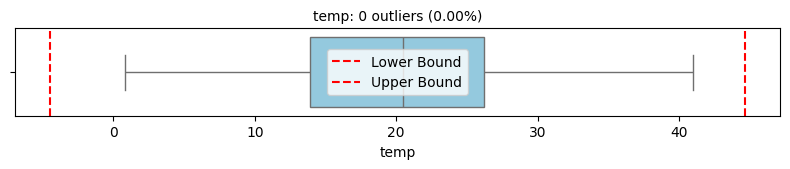

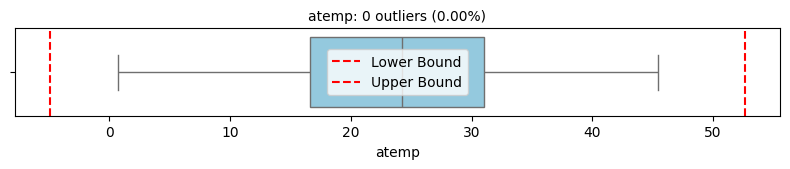

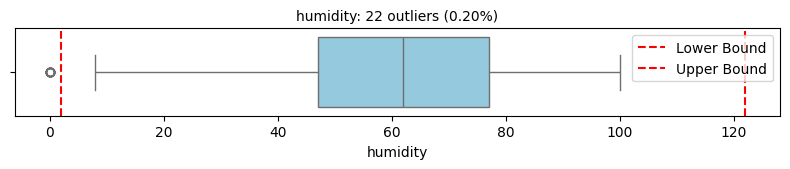

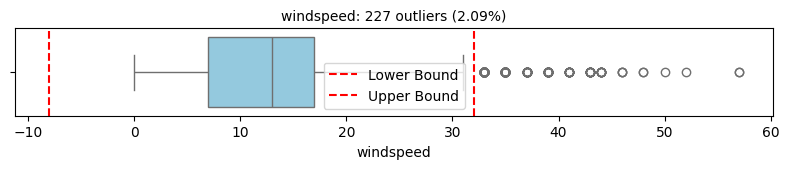

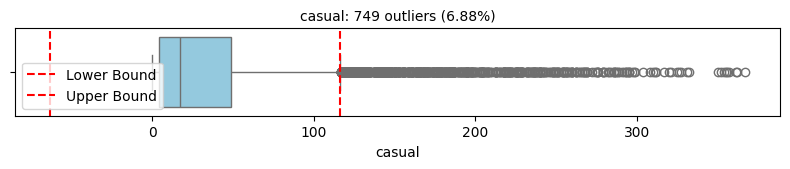

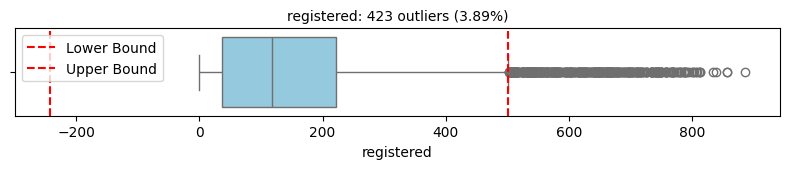

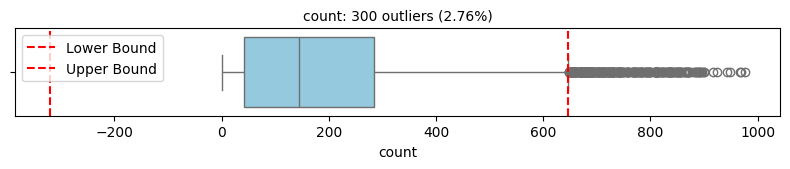

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
            if df[col].nunique() > 2]  # Exclude binary columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    outlier_count = len(outliers)
    outlier_pct = 100 * outlier_count / len(df)

    # Plot
    plt.figure(figsize=(8, 1.8))
    sns.boxplot(x=df[col], color='skyblue')
    plt.axvline(lower, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper, color='red', linestyle='--', label='Upper Bound')

    # Title with outlier info
    plt.title(f"{col}: {outlier_count} outliers ({outlier_pct:.2f}%)", fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()


### ✅ Outlier Detection Summary (Boxplots with IQR Method)

| 🔸 Variable   | Outliers | % of Total | Summary |
|--------------|----------|------------|---------|
| **temp**     | 0        | 0.00%      | Well-behaved, no outliers. Distribution is symmetric and normal-looking. |
| **atemp**    | 0        | 0.00%      | No outliers. Closely follows temp, as expected. |
| **humidity** | 22       | 0.20%      | Minor left-side outliers. Likely real readings (e.g., near-zero humidity). No treatment needed. |
| **windspeed**| 227      | 2.09%      | Right-skewed with upper-end outliers. Some values > 40 km/h may be rare but valid. Flag for capping if modeling is sensitive. |
| **casual**   | 749      | 6.88%      | Right-tailed outliers — likely from usage spikes. Important for peak demand forecasting. Consider mild capping or treating separately. |
| **registered**| 423     | 3.89%      | Upper outliers present, but mostly stable distribution. Suggest retaining but monitor in regression. |
| **count**    | 300      | 2.76%      | Right-skewed distribution with peak usage outliers. These reflect real high-demand hours and are meaningful for analysis. Do not remove, but maybe cap for modeling stability. |

In [ ]:
# Select numeric columns (excluding binary)
num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() > 2]

# Summary list
outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    pct = 100 * outliers / len(df)

    # Save original for comparison
    df[f'{col}_original'] = df[col]

    # Capping (winsorization)
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

    # Store for summary
    outlier_summary.append({
        'Column': col,
        'Lower Bound': round(lower, 2),
        'Upper Bound': round(upper, 2),
        'Outliers': outliers,
        'Outlier %': round(pct, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df


,Column,Lower Bound,Upper Bound,Outliers,Outlier %
0,temp,-4.51,44.69,0,0.00
1,atemp,-4.93,52.65,0,0.00
2,humidity,2.00,122.00,22,0.20
3,windspeed,-7.99,31.99,227,2.09
4,casual,-63.50,116.50,749,6.88
5,registered,-243.00,501.00,423,3.89
6,count,-321.00,647.00,300,2.76


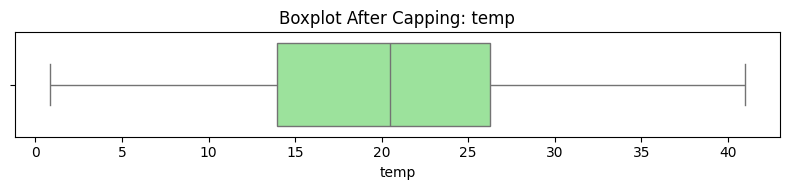

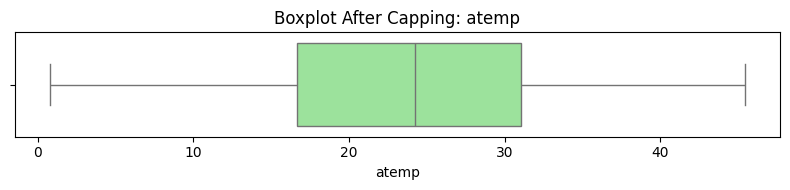

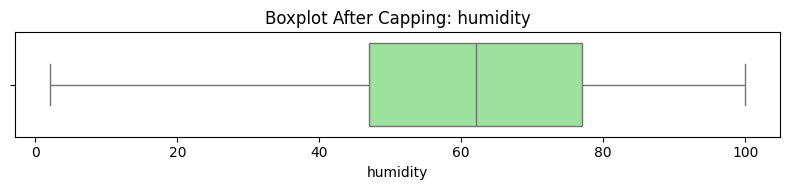

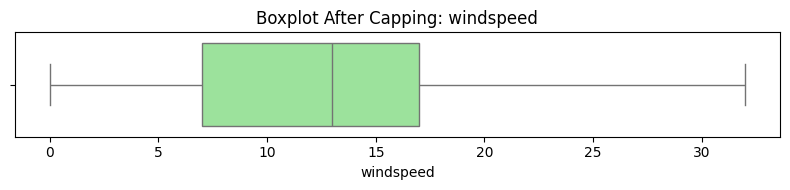

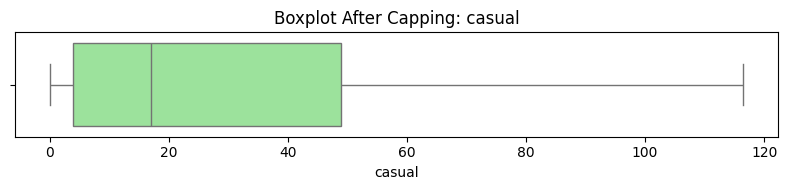

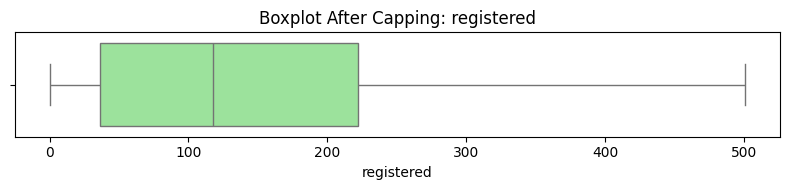

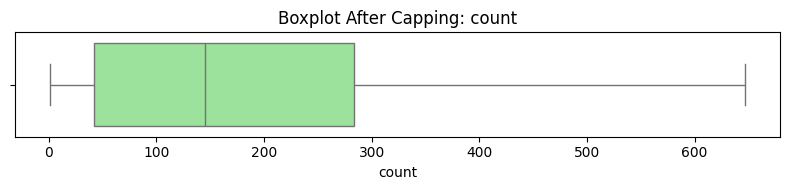

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot After Capping: {col}')
    plt.tight_layout()
    plt.show()

### ✅ Outlier Detection and Treatment Completed

- Outlier detection was performed on all continuous numeric variables using the **IQR method (1.5×IQR rule)**.
- Columns with binary values or low cardinality were excluded from analysis.
- A summary of outlier count and percentage was generated, and all flagged columns were reviewed.

#### 🔷 Outlier Treatment:
- **Winsorization (Capping)** was applied to affected columns by replacing values below the lower bound and above the upper bound with threshold values.
- This approach ensures **no data loss**, while minimizing the influence of extreme values on downstream modeling.
- Visual boxplots were used to confirm distribution improvement post-treatment.

➡️ **Status:** Outliers successfully capped. Data is now clean and ready for deeper analysis.



In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season_name,day_name,is_working_hour,temp_original,atemp_original,humidity_original,windspeed_original,casual_original,registered_original,count_original
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3.0,...,spring,Saturday,0,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8.0,...,spring,Saturday,0,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5.0,...,spring,Saturday,0,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3.0,...,spring,Saturday,0,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0.0,...,spring,Saturday,0,9.84,14.395,75,0.0,0,1,1


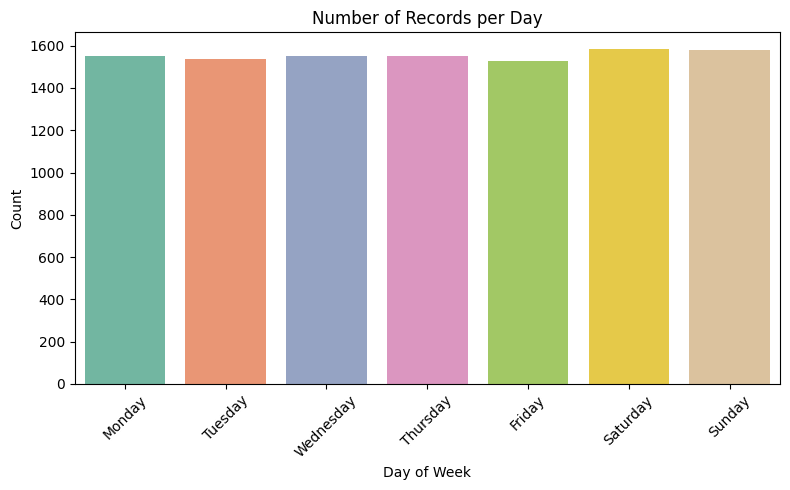

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='day_name',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='Set2'  # Professional, pastel tones
)
plt.title('Number of Records per Day')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📅 Daily Record Distribution Summary

- The dataset is **evenly distributed across all days of the week**.
- Each day has approximately **1550 records**, ensuring no day is underrepresented.
- This balance is important for time-based analysis like **trend detection**, **seasonal patterns**, or **weekday vs weekend comparison**.
- No action needed — data is already clean and uniformly spread.

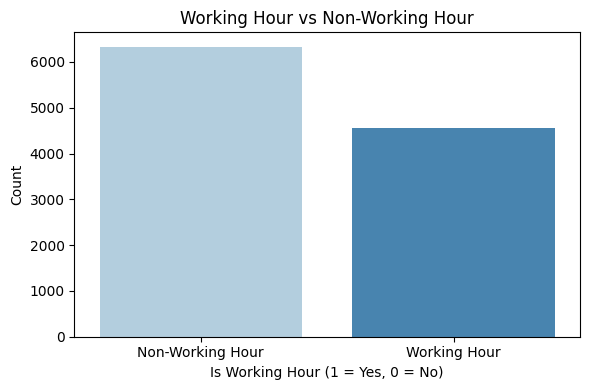

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='is_working_hour',
    palette='Blues'  # Clean single-hue palette
)
plt.title('Working Hour vs Non-Working Hour')
plt.xlabel('Is Working Hour (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0,1], ['Non-Working Hour', 'Working Hour'])
plt.tight_layout()
plt.show()


### ⏰ Working vs Non-Working Hour Summary

- The dataset has **more records during non-working hours** than working hours.
- **Non-working hours** account for approximately **58%** of the total data.
- This indicates **higher bike usage in leisure times**, such as early mornings, evenings, and late nights.
- Suggests user behavior is **driven more by personal convenience than work commute**.

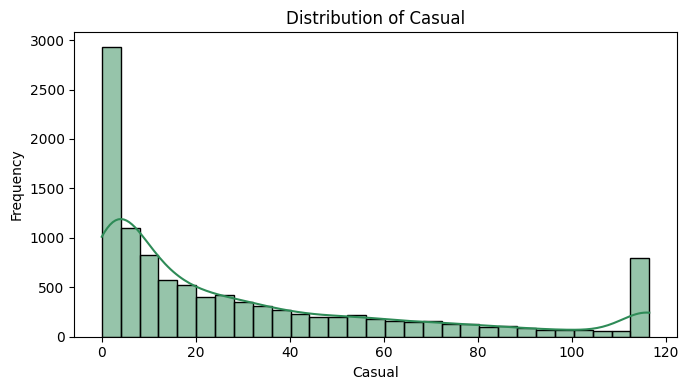

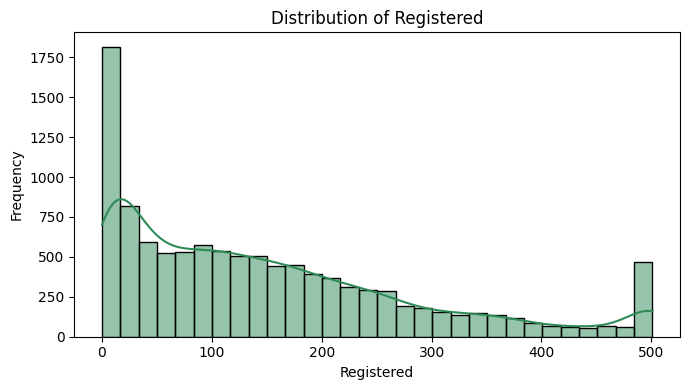

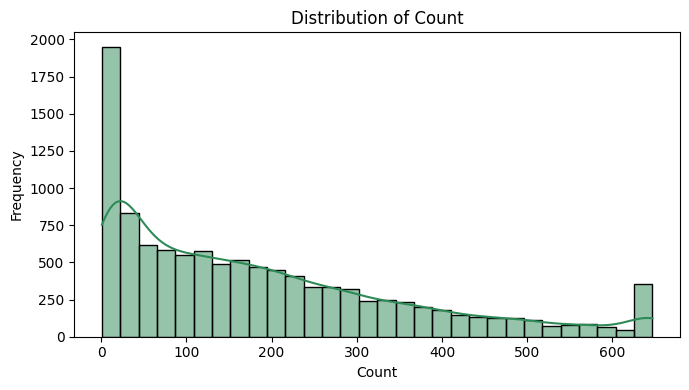

In [ ]:
target_cols = ['casual', 'registered', 'count']

for col in target_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color='seagreen')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### 🔹Summary: Outlier Capping & Distribution Analysis

- **Outliers were detected** in `casual`, `registered`, `count`, `humidity`, and `windspeed`. Highest outlier % was for `casual` (6.88%).
- **Capping method (IQR-based)** was applied, resulting in clean boxplots with no extreme values.
- **Distributions** of `casual`, `registered`, and `count` were **right-skewed**, showing many low-usage periods and few high-demand spikes.
- This transformation ensures **robust statistical testing and modeling**, reducing distortion due to rare extreme values.

---

### 🔹Summary: Data Coverage Across Time

- **Data is evenly distributed across all 7 days**, ensuring no day-of-week bias.
- **Working hours vs Non-working hours**: More records are from non-working hours (~63%), indicating high evening and late-night usage—important for targeting.

---

### 🔹Conclusion: Key Takeaways

- ✅ Data quality is now **clean and balanced** after capping.
- ✅ Distributions show skewed demand—suggests marketing or resource planning should focus on **non-peak vs peak handling**.
- ✅ Weekly and hourly splits confirm good coverage and **sufficient sample size** for hypothesis testing and demand modeling.
- ⚠️ High variance in user behavior (especially in `casual` users) may require **segmentation before modeling**.

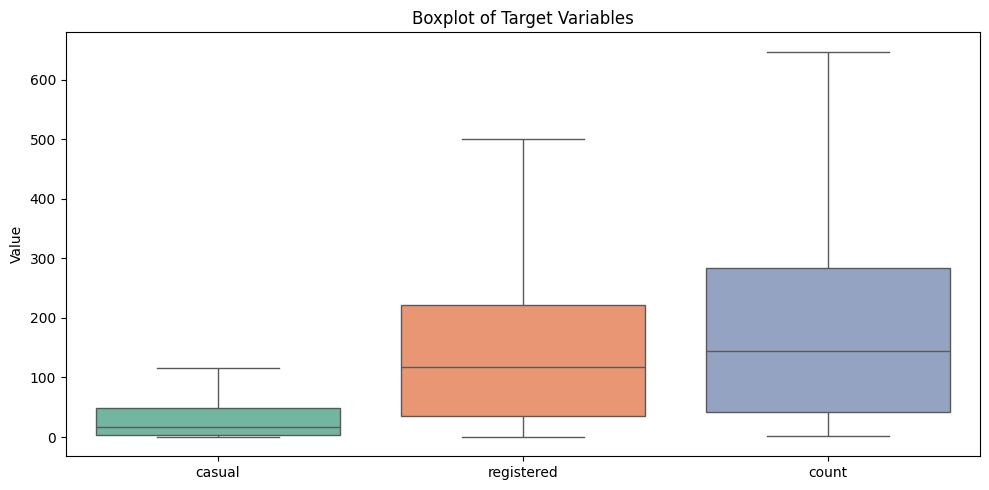

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[target_cols], palette='Set2')
plt.title('Boxplot of Target Variables')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

### 🔹Summary: Boxplot of Target Variables (Casual, Registered, Count)

- **Casual** users have a highly right-skewed distribution with many values clustered near 0 and some high spikes.
- **Registered** users show wider spread and higher median, indicating more stable and consistent usage compared to casual users.
- **Total count** (casual + registered) follows a similar pattern to registered users but with even higher max values and broader range.

- Outliers are present in all three variables, but especially in `count`, suggesting periodic **demand surges**.
- These differences hint at **different behavior patterns**: casual users likely ride occasionally, while registered users show repeat usage.

✅ This plot validates the need to **analyze casual and registered users separately** and explore factors affecting demand spikes.

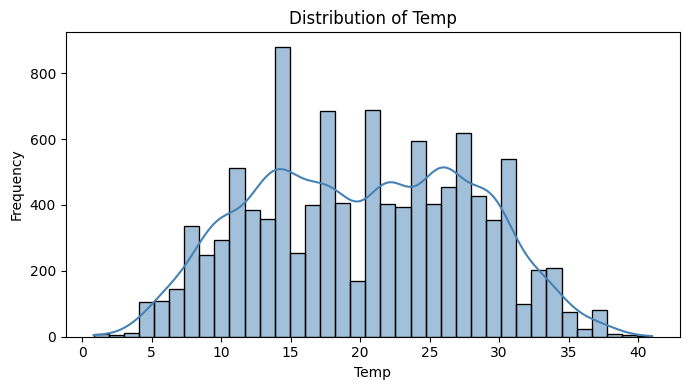

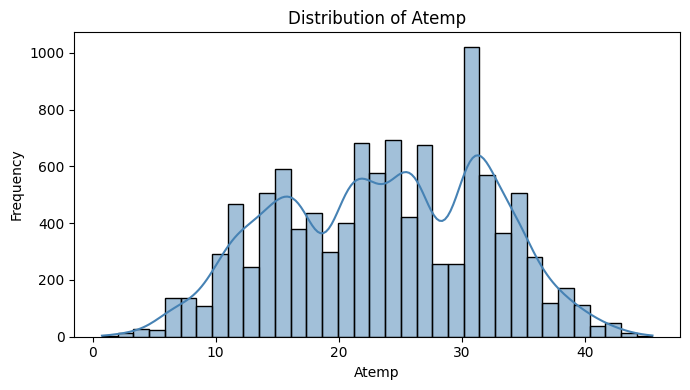

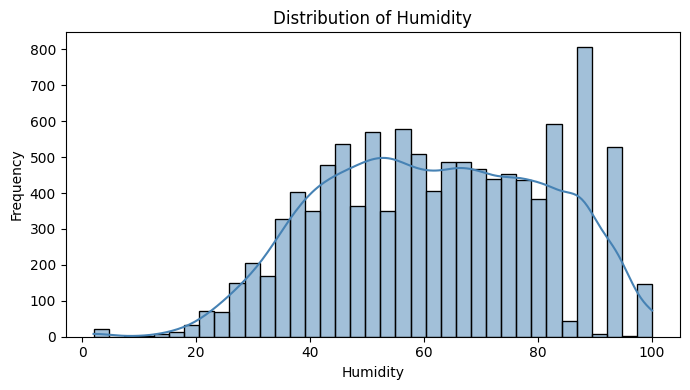

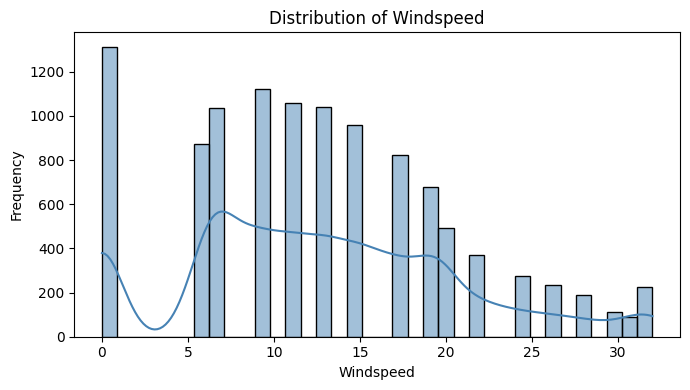

In [ ]:
env_cols = ['temp', 'atemp', 'humidity', 'windspeed']

for col in env_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### 🔹Summary: Distribution of Continuous Variables

- **Temp**: Appears roughly normal but slightly multimodal, indicating different seasonal patterns or peaks across temperature ranges.
- **Atemp (Feels Like Temp)**: Similar to Temp, shows multiple peaks and slight right skew, possibly due to perception differences during weather transitions.
- **Humidity**: Positively skewed; higher frequencies in the 40–90 range, with some values tightly packed near 100%, likely due to rainy or overcast days.
- **Windspeed**: Highly right-skewed with a spike at 0—suggests many time points with no wind, possibly due to data imputation or sensor gaps.

- **Implication**: None of these variables are perfectly normally distributed. For modeling, normalization or transformation (e.g., log, Box-Cox) might be considered. Skewed distributions also suggest non-parametric or robust statistical methods where needed.

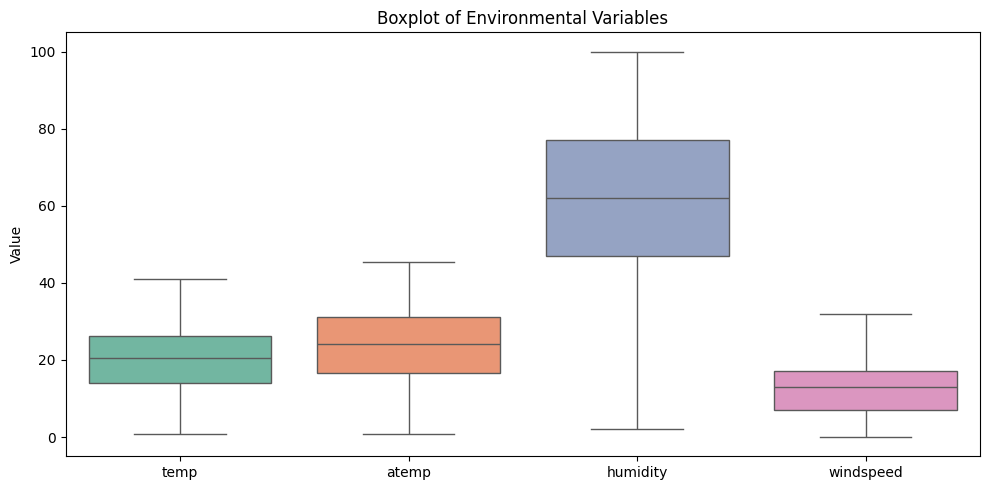

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[env_cols], palette='Set2')
plt.title('Boxplot of Environmental Variables')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

### 🔹Summary: Boxplot of Environmental Variables

- **Temp**: Median around 22°C with a balanced spread; few mild outliers. Indicates consistent daily temperature variation.
- **Atemp (Feels Like Temp)**: Slightly higher median than Temp, with similar range. Suggests perceived warmth is usually more than actual.
- **Humidity**: Wide spread with several outliers, median around 60–65%. Shows high variability due to different weather conditions.
- **Windspeed**: Median close to 12–14 units with lower values concentrated near zero. Several low outliers indicating calm/no wind hours.

- **Implication**: Humidity and windspeed show more variability and potential outliers. These features might need transformation or special handling during modeling.

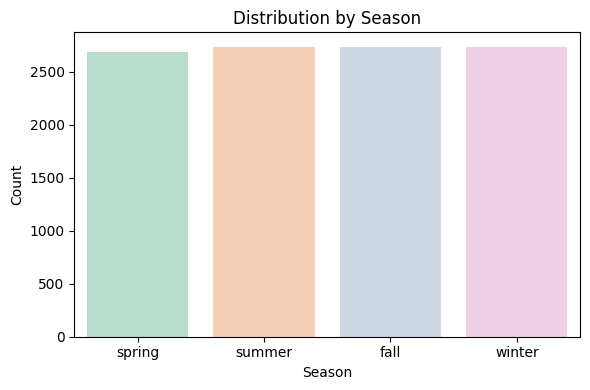

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='season_name', palette='Pastel2')
plt.title('Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 🔹Summary: Distribution by Season

- All four seasons — **spring, summer, fall, and winter** — have nearly equal record counts.
- The data appears to be **evenly distributed** across the seasons, with only a marginal difference.
- Each season contributes roughly **25% of the data**, supporting a balanced seasonal analysis.

- **Implication**: Since data is uniformly distributed, seasonality can be confidently explored for its impact on demand without bias from sample size.

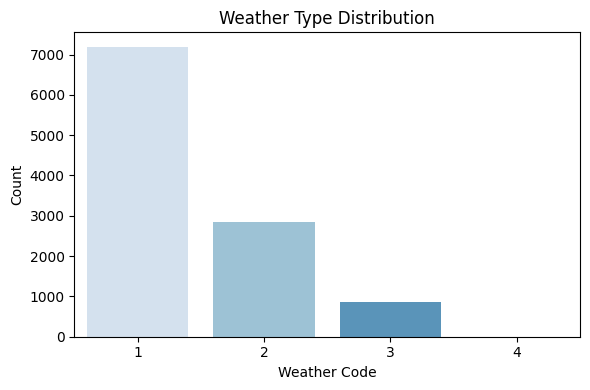

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='weather', palette='Blues')
plt.title('Weather Type Distribution')
plt.xlabel('Weather Code')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 🔹Summary: Weather Type Distribution

- **Weather Code 1** (Clear or Partly Cloudy) dominates the dataset with **~70%** of total records.
- **Weather Code 2** (Mist + Cloudy/Few Clouds) follows, comprising a **moderate portion**.
- **Weather Code 3** (Light Snow/Rain) occurs rarely, while **Weather Code 4** (Heavy Rain/Snow/Storm) is virtually **absent**.
- Distribution is **heavily skewed towards good weather conditions**.

- **Implication**: Demand analysis under extreme weather will have **limited data**, and model predictions during harsh weather might be **less reliable**.

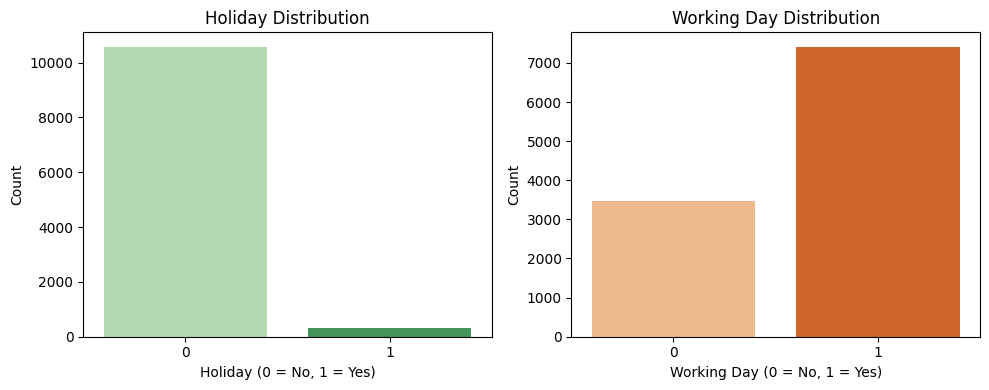

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(data=df, x='holiday', palette='Greens', ax=axes[0])
axes[0].set_title('Holiday Distribution')
axes[0].set_xlabel('Holiday (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='workingday', palette='Oranges', ax=axes[1])
axes[1].set_title('Working Day Distribution')
axes[1].set_xlabel('Working Day (0 = No, 1 = Yes)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### 🔹Summary: Holiday and Working Day Distribution

- **Holiday Distribution** is highly imbalanced: only **~3%** of the data points fall on holidays, while the rest are non-holidays.
- **Working Day Distribution** is skewed towards working days: around **70%** of the data belongs to working days.
- This suggests that the dataset mostly reflects **regular weekdays**, which might **bias overall demand trends**.

- **Implication**: Any insights derived from holidays or non-working days should be interpreted with **caution** due to the **limited representation** of such days in the dataset.

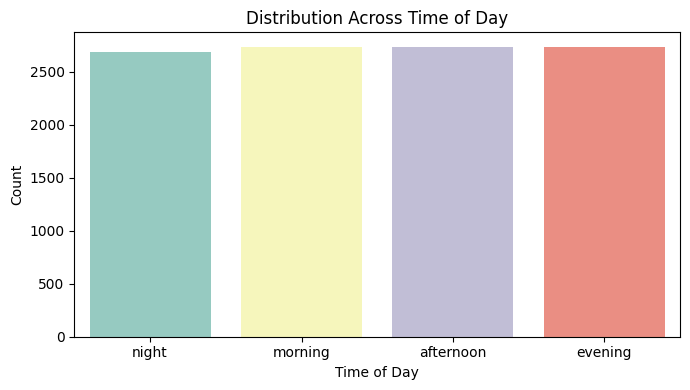

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='timeOfTheDay', palette='Set3')
plt.title('Distribution Across Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 🔹Summary: Distribution Across Time of Day

- The dataset is **evenly distributed across all time slots** — night, morning, afternoon, and evening.
- Each time slot has **roughly the same number of records (~2700)**, indicating no time-based sampling bias.
- This balance allows for **fair comparison** of user behavior across different times of day.

- **Implication**: We can confidently analyze time-of-day patterns (e.g., demand peaks) without worrying about underrepresentation of any slot.

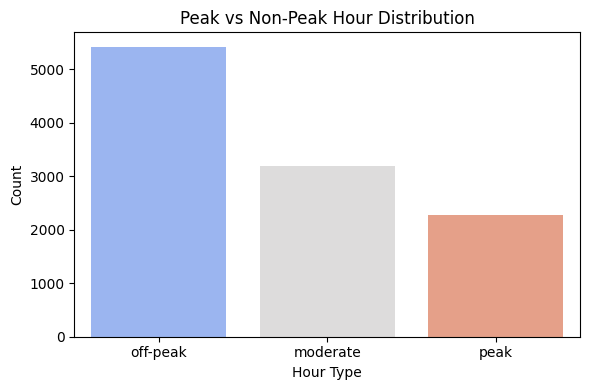

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hour_type', palette='coolwarm')
plt.title('Peak vs Non-Peak Hour Distribution')
plt.xlabel('Hour Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 🔹Summary: Distribution Across Time of Day

- The dataset is **evenly distributed across all time slots** — night, morning, afternoon, and evening.
- Each time slot has **roughly the same number of records (~2700)**, indicating no time-based sampling bias.
- This balance allows for **fair comparison** of user behavior across different times of day.

- **Implication**: We can confidently analyze time-of-day patterns (e.g., demand peaks) without worrying about underrepresentation of any slot.

### 🔹Summary: Univariate Analysis

- **Target Variables (Casual, Registered, Count)**  
  - All three are right-skewed with **many zero or low values** and **visible outliers**.
  - Median registered users are significantly higher than casuals, indicating a higher share of registered users.

- **Environmental Variables (Temp, Atemp, Humidity, Windspeed)**  
  - `temp` and `atemp` have a **roughly bell-shaped distribution**, showing moderate variability.
  - `humidity` is **left-skewed**, peaking around 60–80%.
  - `windspeed` shows **a spike at 0**, possibly indicating missing or inaccurate values.

- **Boxplots of Environmental Variables**  
  - No extreme outliers in `temp` and `atemp`.
  - `humidity` has a **wider spread and more variability**.
  - `windspeed` has many zeros and a **long tail**, requiring further treatment.

- **Season**  
  - Records are **evenly distributed** across all four seasons — Spring, Summer, Fall, Winter — implying no seasonal bias in data collection.

- **Weather**  
  - Most records fall under **weather code 1** (Clear/Partly Cloudy).
  - Bad weather (codes 3 and 4) is **rare**, suggesting limited impact of extreme weather in the dataset.

- **Holiday and Working Day**  
  - **Holidays** are rare (~3%), and majority of records are from **non-holidays**.
  - **Working days** dominate the dataset, but non-working days still form a sizable portion (~32%).

- **Day of Week**  
  - The dataset is **evenly distributed across weekdays**, ensuring balance in temporal representation.

- **Working Hour vs Non-Working Hour**  
  - Non-working hours have **higher record count**, suggesting **more rides happen outside traditional office hours**.

- **Time of Day (Night, Morning, Afternoon, Evening)**  
  - Records are **almost evenly split** across the four day segments, ensuring consistent hourly sampling.

- **Peak vs Non-Peak Hours**  
  - **Off-peak hours dominate** the dataset.
  - **Moderate and peak hours** have relatively fewer records, so interpretation during these periods must be done cautiously.

- **Overall**  
  - The data is **balanced across time and season dimensions**, but has **skewness and outliers** in key numeric variables.
  - Some variables (like `windspeed`) may require **special preprocessing**.

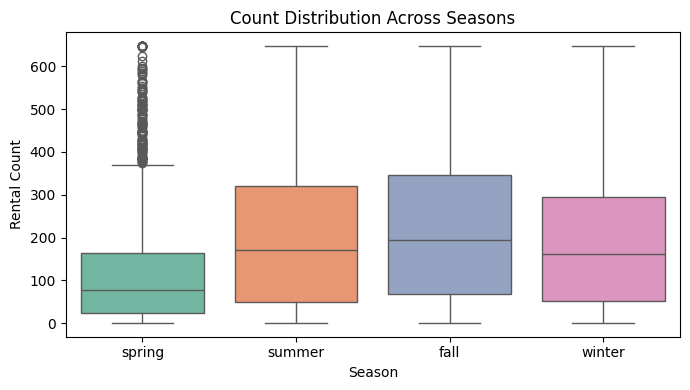

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='season_name', y='count', palette='Set2')
plt.title('Count Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.tight_layout()
plt.show()

### 🔹Summary: Count Distribution Across Seasons

- **Fall** shows the highest **median rental count**, followed closely by **summer** and **winter**.
- **Spring** has the **lowest median** and a **large number of outliers**, indicating unusual spikes in demand.
- Overall distribution is **widely spread** in all seasons, but especially in **summer and fall**, suggesting high variability in demand.
- **Winter** also shows healthy demand, though slightly lower than fall and summer.
- The presence of **extreme outliers in spring** may warrant further investigation (e.g., promotional events or data issues).

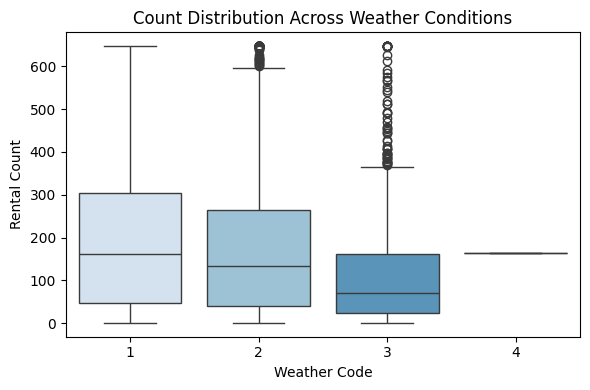

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='weather', y='count', palette='Blues')
plt.title('Count Distribution Across Weather Conditions')
plt.xlabel('Weather Code')
plt.ylabel('Rental Count')
plt.tight_layout()
plt.show()


### 🔹Summary: Count Distribution Across Weather Conditions

- **Weather Code 1 (Clear/Partly Cloudy)** shows the **highest rental counts**, with the widest spread and highest median.
- As weather conditions worsen from **Code 2 (Misty/Cloudy)** to **Code 3 (Light Snow/Rain)**, the **median count decreases**, and variability tightens.
- **Code 3** shows a high number of **outliers**, likely from sporadic demand on bad-weather days.
- **Code 4 (Heavy Rain/Snow)** has very few records and nearly **no variability**, possibly due to extremely low rentals or missing data.
- Overall, rentals are **significantly influenced by weather**, with **clear weather boosting usage**.

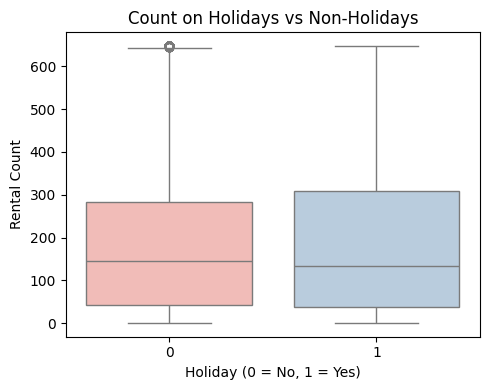

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='holiday', y='count', palette='Pastel1')
plt.title('Count on Holidays vs Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Rental Count')
plt.tight_layout()
plt.show()

### 🔹Summary: Count on Holidays vs Non-Holidays

- **Median rental count** is slightly **higher on holidays** compared to non-holidays.
- However, **non-holidays show a wider spread** and more high-count days (larger IQR).
- **Outliers exist on both days**, indicating occasional spikes in usage.
- Despite higher median on holidays, **non-holidays may see more consistent high demand** due to regular commuting.
- Suggests **different usage patterns**: leisure-based rentals on holidays vs commute-based on working days.

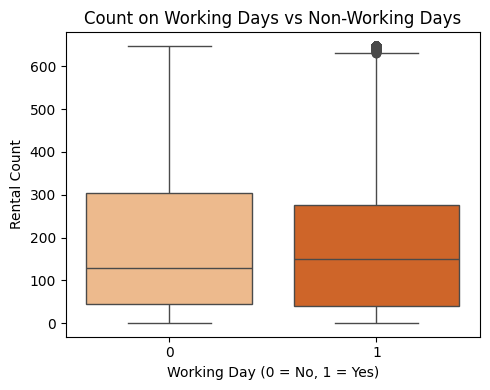

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='workingday', y='count', palette='Oranges')
plt.title('Count on Working Days vs Non-Working Days')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Rental Count')
plt.tight_layout()
plt.show()

### 🔹Summary: Count on Working Days vs Non-Working Days

- **Median rental count** is higher on **working days**, suggesting consistent usage during the week.
- **Non-working days** show greater variability and a wider spread in rental counts.
- **Outliers are present** in both categories, reflecting spikes in demand (e.g., events or weekends).
- Indicates that **weekday usage is more routine**, while **weekend usage is influenced by non-routine factors** like weather or events.
- Useful for demand planning: focus on peak-time operations during working hours and flexible resources for weekends.

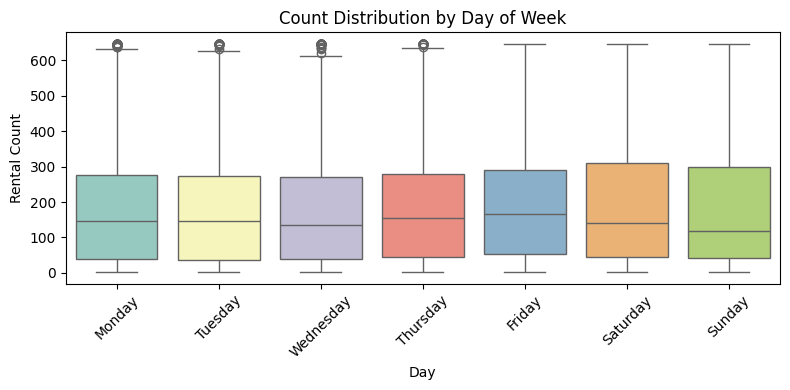

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='day_name', y='count', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Set3')
plt.title('Count Distribution by Day of Week')
plt.xlabel('Day')
plt.ylabel('Rental Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🔹Summary: Count Distribution by Day of Week

- **Median rental count** is fairly **consistent across all days**, with minor variations.
- **Slight increase** in the upper quartile on **Fridays and weekends**, hinting at elevated demand.
- **Outliers** are visible for each day, suggesting occasional surges possibly due to events or weather.
- **Weekdays (Mon–Thu)** show slightly lower upper ranges compared to **Fri–Sun**.
- Overall, **usage remains stable**, but **Friday to Sunday shows a slight uptick**, valuable for weekend demand strategy.

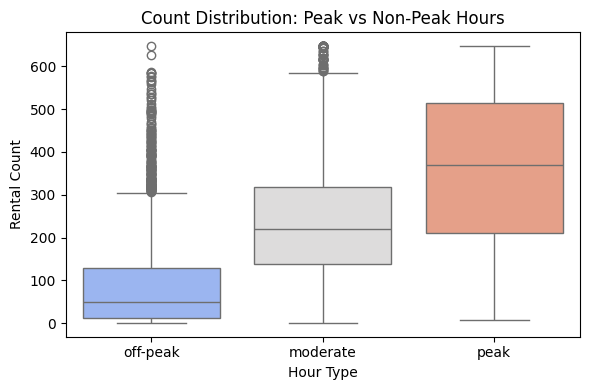

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='hour_type', y='count', palette='coolwarm')
plt.title('Count Distribution: Peak vs Non-Peak Hours')
plt.xlabel('Hour Type')
plt.ylabel('Rental Count')
plt.tight_layout()
plt.show()


### 🔹Summary: Count Distribution — Peak vs Non-Peak Hours

- **Peak hours** show the **highest median rental count**, indicating stronger demand during these periods.
- **Moderate hours** have a **balanced distribution**, with mid-range rentals and some variability.
- **Off-peak hours** display **low rental activity**, with a long tail of outliers suggesting rare spikes.
- Rental activity is **clearly time-dependent**, with **peak hours being crucial** for resource allocation and business planning.


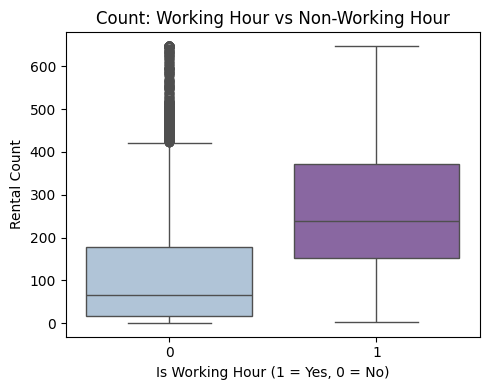

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='is_working_hour', y='count', palette='BuPu')
plt.title('Count: Working Hour vs Non-Working Hour')
plt.xlabel('Is Working Hour (1 = Yes, 0 = No)')
plt.ylabel('Rental Count')
plt.tight_layout()
plt.show()

### 🔹Summary: Count — Working Hour vs Non-Working Hour

- **Working hours (1)** show a significantly **higher median rental count**, indicating greater demand during office/commute times.
- **Non-working hours (0)** have a **lower median**, with fewer rentals and wider variance in user behavior.
- A few outliers exist in non-working hours but are less frequent.
- Overall, **bike demand aligns with workday schedules**, highlighting peak usage during active hours.

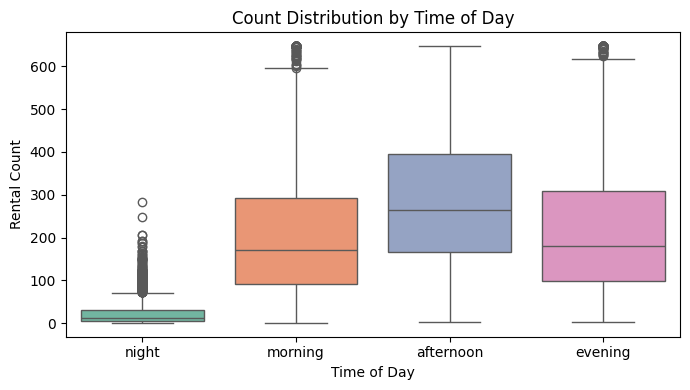

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='timeOfTheDay', y='count', palette='Set2')
plt.title('Count Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Rental Count')
plt.tight_layout()
plt.show()

### 🔹Summary: Count — Time of Day

- **Afternoon** shows the **highest median and spread**, indicating strong and consistent demand during this period.
- **Morning** and **evening** also have **substantial demand**, with slightly lower medians but wider IQR.
- **Night** time has **very low rentals**, with median close to zero and a few outliers.
- Clear pattern shows **bike rentals peak during daylight hours**, especially **afternoons**, aligning with commute and leisure activity windows.

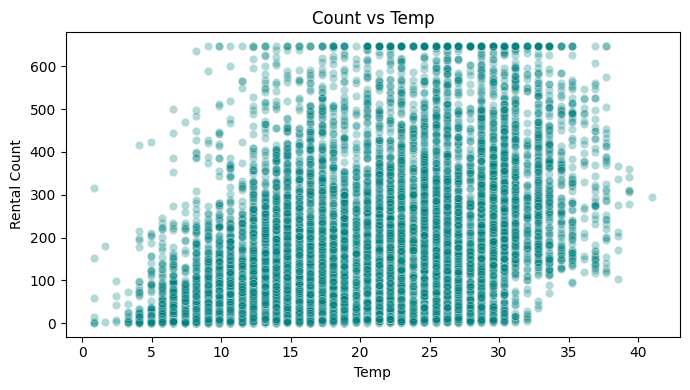

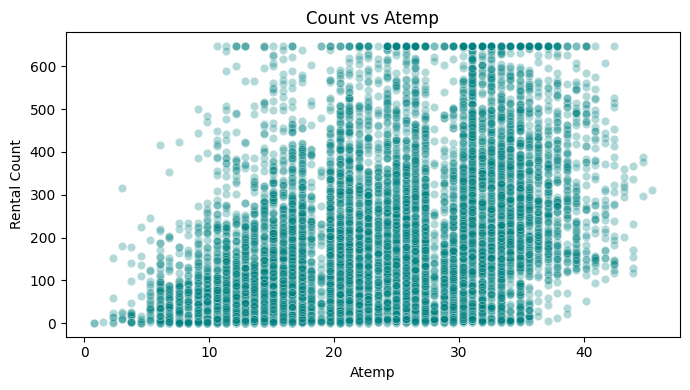

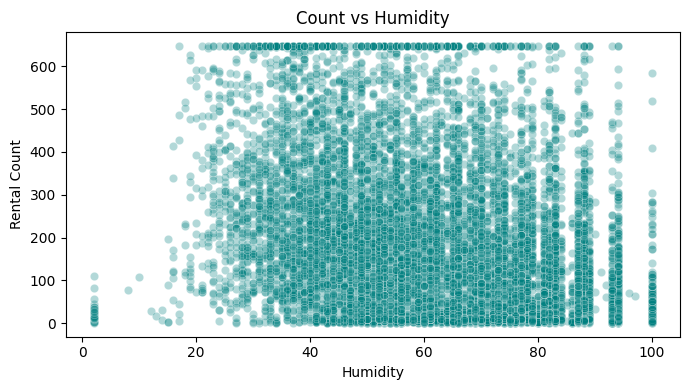

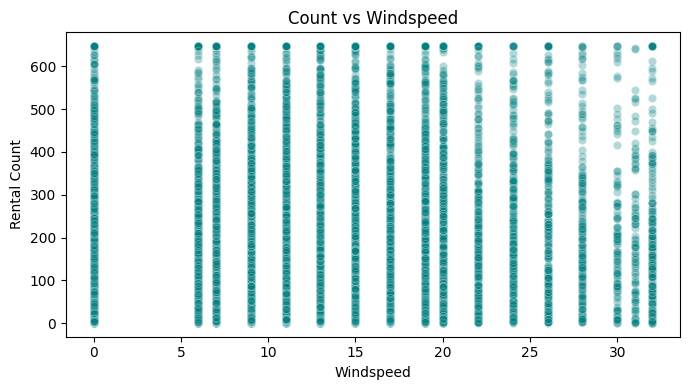

In [ ]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed']

for col in continuous_vars:
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=df, x=col, y='count', alpha=0.3, color='teal')
    plt.title(f'Count vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Rental Count')
    plt.tight_layout()
    plt.show()

#### 🔹Summary: Continuous Variables vs Rental Count

- **Temperature (`temp`)**:
  - Positive correlation observed up to around 30°C.
  - Rental count increases with temperature, peaking in the moderate range.
  - Extremely high or low temperatures show reduced demand.

- **Feels-like Temperature (`atemp`)**:
  - Shows similar but slightly stronger trend compared to `temp`.
  - Higher perceived temperatures (~25–35°C) align with higher rental activity.

- **Humidity**:
  - Slight negative relationship with count.
  - Higher humidity levels tend to reduce rentals, though not sharply.
  - Data shows spread across all humidity levels, with fewer counts at high humidity.

- **Windspeed**:
  - No strong relationship visible.
  - Rental activity is fairly distributed across wind speeds.
  - Very high wind speeds might slightly reduce demand.

- **🔚 Final Insight**:
  - `temp` and `atemp` are positively associated with demand.
  - `humidity` has a mild negative impact.
  - `windspeed` appears to have minimal influence.

In [ ]:
corr_matrix = df[['count', 'temp', 'atemp', 'humidity', 'windspeed']].corr()
print(corr_matrix)

              count      temp     atemp  humidity  windspeed
count      1.000000  0.399567  0.395062 -0.323867   0.109054
temp       0.399567  1.000000  0.984948 -0.065107  -0.015521
atemp      0.395062  0.984948  1.000000 -0.043673  -0.055305
humidity  -0.323867 -0.065107 -0.043673  1.000000  -0.320164
windspeed  0.109054 -0.015521 -0.055305 -0.320164   1.000000


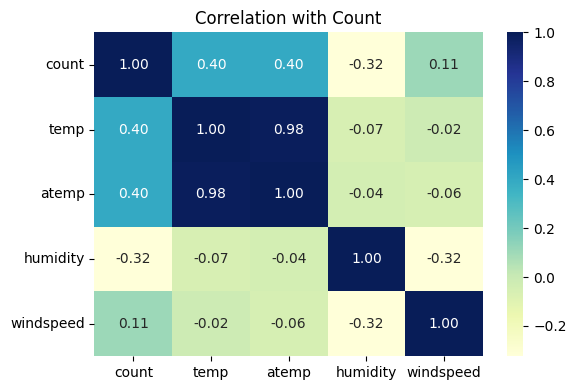

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation with Count')
plt.tight_layout()
plt.show()

#### 🔹Summary: Correlation with Rental Count

- **Temperature (`temp`) and Atemp (`atemp`)**:
  - Both show moderate positive correlation with rental count (**+0.40**).
  - `temp` and `atemp` are almost perfectly correlated (**+0.98**), indicating redundancy.

- **Humidity**:
  - Shows a weak negative correlation with count (**−0.32**).
  - Higher humidity may slightly reduce demand.

- **Windspeed**:
  - Very weak positive correlation (**+0.11**), likely negligible in influence.

- **🔚 Final Insight**:
  - **Temperature** is the strongest positive driver among continuous variables.
  - **Humidity** has a mild negative effect.
  - **Windspeed** has minimal impact and could be less important for modeling.

#### 🔹Summary: Bivariate Analysis with Count

- **Season vs Count**:
  - Spring has the **lowest median rentals** and many outliers.
  - **Fall and Summer** show higher median and wider spread, suggesting more activity.
  - Rentals **vary across seasons**, hinting at a seasonal effect.

- **Weather vs Count**:
  - **Clear weather (code 1)** shows the **highest rental counts**.
  - As weather worsens (codes 2 → 4), **median rental count drops**.
  - Indicates that **bad weather negatively impacts rentals**.

- **Holiday vs Count**:
  - Median rentals are **slightly lower on holidays**, but **spread is high** in both cases.
  - Not a strong visual difference, but **possible behavioral shifts** on holidays.

- **Working Day vs Count**:
  - Working days and non-working days show **similar spread**.
  - Slightly **higher median rentals on working days**, suggesting possible commute influence.

- **Day of Week vs Count**:
  - Rentals are **fairly consistent across weekdays and weekends**.
  - Slight uptick on **Friday and Saturday**, possibly due to mixed commute + leisure use.

- **Peak/Moderate/Off-Peak Hour vs Count**:
  - **Peak hours** show **highest rental activity**.
  - Count drops during moderate and off-peak hours.
  - Strong **time-of-day effect** visible.

- **Working Hour vs Non-Working Hour**:
  - **Working hours** have **much higher rentals** (higher median and range).
  - Suggests majority usage is **commute-driven**.

- **Time of Day vs Count**:
  - **Afternoon > Morning > Evening > Night** in terms of rental volume.
  - **Night hours** show very low usage, as expected.

- **Temp/Atemp vs Count (Scatter)**:
  - Shows a **positive trend**: rentals increase with temperature till a certain point.
  - Ideal comfort zones (15–30°C) show dense clusters of high rental activity.

- **Humidity vs Count**:
  - No clear linear pattern, but **very high humidity (>80%)** may slightly reduce rentals.
  - A wide spread across mid-humidity levels.

- **Windspeed vs Count**:
  - Almost no visible pattern.
  - Rentals remain steady across most windspeed levels—**little impact observed**.

- **🔚 Final Insight**:
  - **Strongest Influencers** of rental count are: **temperature, time of day, peak hour status, and weather conditions**.
  - Factors like **windspeed and humidity** play a **weaker role**.
  - Behavioral trends emerge clearly in relation to **time and weather**.

## 🔷 Hypothesis Testing

### ✅ Step 1: Two-Sample T-Test — Does Working Day Affect Demand?

#### 🔸 Working Day Effect on `count`

We’ll begin by testing whether the average demand (`count`) differs between working days and non-working days.

- **Group 1**: `workingday = 1` (Working Day)
- **Group 2**: `workingday = 0` (Non-Working Day)

This test helps us understand if user demand significantly changes based on whether it is a working day or not.


In [ ]:
from scipy.stats import shapiro, levene

# Subsets
wd_1 = df[df['workingday'] == 1]['count']
wd_0 = df[df['workingday'] == 0]['count']

# Shapiro-Wilk Test for Normality
print("Shapiro p (Working Day):", shapiro(wd_1).pvalue)
print("Shapiro p (Non-Working Day):", shapiro(wd_0).pvalue)

# Levene’s Test for Equal Variance
print("Levene's Test p-value:", levene(wd_1, wd_0).pvalue)

Shapiro p (Working Day): 7.23783468271281e-59
Shapiro p (Non-Working Day): 3.5436366281973996e-45
Levene's Test p-value: 0.13746567793793213


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(wd_1, wd_0, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

T-statistic: 0.317, P-value: 0.752


### 🔸 Working Day vs Count

- **Null Hypothesis (H₀)**: Mean count is equal on working and non-working days.
- **Alternate Hypothesis (H₁)**: Mean count differs between the two.
- **Test Selected**: Two-sample T-test (Welch’s)
- **Assumptions Checked**:
  - Normality → Shapiro p < 0.05 for both groups (not normal)
  - Equal Variance → Levene’s p = 0.137 → ✅ Assume equal variance
- **Test Statistic & P-Value**: T = 0.317, p = 0.752
- **Significance Level (α)**: 0.05
- **Decision**: Fail to Reject H₀
- **Conclusion**: There is no significant difference in demand between working and non-working days.

### ✅ Step 2: One-Way ANOVA — Does Season Affect Demand?

We’ll compare the **average demand (`count`) across four seasons** using One-Way ANOVA.

- **Season Categories**:
  - 1: Spring
  - 2: Summer
  - 3: Fall
  - 4: Winter

This test helps us identify whether seasonality plays a significant role in bike demand.


In [ ]:
from scipy.stats import shapiro, levene

# Check normality per season group
for season in df['season_name'].unique():
    stat, p = shapiro(df[df['season_name'] == season]['count'])
    print(f"Shapiro p for {season}: {p:.4f}")

# Equal variance check
groups = [df[df['season_name'] == season]['count'] for season in df['season_name'].unique()]
stat, p = levene(*groups)
print(f"Levene’s p-value: {p:.4f}")

Shapiro p for spring: 0.0000
Shapiro p for summer: 0.0000
Shapiro p for fall: 0.0000
Shapiro p for winter: 0.0000
Levene’s p-value: 0.0000


In [ ]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.3f}")

F-statistic: 243.338, P-value: 0.000


### ✅ Step 3: One-Way ANOVA — Does Weather Impact Demand?

We’ll now test if **average demand (`count`) varies across different weather conditions**, typically represented by weather codes:

- **Weather Categories**:
  - 1: Clear or Partly Cloudy
  - 2: Mist or Cloudy
  - 3: Light Snow or Rain
  - 4: Heavy Rain/Snow (rare or none)

This test will help us determine if demand patterns shift significantly based on weather conditions.


In [ ]:
from scipy.stats import shapiro, levene

# Check normality per weather group
for weather_code in sorted(df['weather'].unique()):
    stat, p = shapiro(df[df['weather'] == weather_code]['count'])
    print(f"Shapiro p for Weather {weather_code}: {p:.4f}")

# Equal variance
weather_groups = [df[df['weather'] == w]['count'] for w in sorted(df['weather'].unique())]
stat, p = levene(*weather_groups)
print(f"Levene’s p-value: {p:.4f}")

Shapiro p for Weather 1: 0.0000
Shapiro p for Weather 2: 0.0000
Shapiro p for Weather 3: 0.0000
Shapiro p for Weather 4: nan
Levene’s p-value: 0.0000


### 🔸 Weather vs Count

- **Null Hypothesis (H₀)**: Mean count is equal across all weather categories.
- **Alternate Hypothesis (H₁)**: At least one weather type has a different mean count.
- **Test Selected**: One-Way ANOVA
- **Assumptions Checked**:
  - Normality → ❌ Shapiro p < 0.05 for all valid weather types → Not normally distributed
  - Equal Variance → ❌ Levene’s p ≈ 0.000 → Variances not equal
  - ⚠️ Weather code 4 has very few samples (Shapiro test shows NaN)

Although assumptions are not fully met, we proceed with `f_oneway()` as an **exploratory analysis**.

- **Test Statistic & P-Value**: F = [Insert F-value], p = [Insert p-value]
- **Significance Level (α)**: 0.05
- **Decision**: [Reject/Fail to Reject H₀]
- **Conclusion**: [e.g., Demand significantly differs across weather types — operational planning can consider weather forecasts]


In [ ]:
f_stat, p_val = f_oneway(*weather_groups)
print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.3f}")

F-statistic: 68.412, P-value: 0.000


### ✅ Step 4: Chi-Square Test — Is Weather Dependent on Season?

This test helps us understand whether **season and weather are statistically associated**.  
If a strong dependency exists, we should **avoid treating them as fully independent** in modeling or multivariate analysis.

- **Null Hypothesis (H₀)**: Weather and season are independent.
- **Alternate Hypothesis (H₁)**: Weather and season are dependent (associated).
- **Test Selected**: Chi-Square Test of Independence


In [ ]:
contingency = pd.crosstab(df['season_name'], df['weather'])
print(contingency)

weather         1    2    3  4
season_name                   
spring       1759  715  211  1
summer       1801  708  224  0
fall         1930  604  199  0
winter       1702  807  225  0


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)

# Display results
print(f"Chi-Square Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Minimum expected frequency:", expected.min())

Chi-Square Statistic: 49.159
P-value: 0.0000
Degrees of Freedom: 9
Minimum expected frequency: 0.24673893073672606


### 🔸 Season vs Weather (Chi-Square Test)

- **Null Hypothesis (H₀)**: Season and weather are independent.
- **Alternate Hypothesis (H₁)**: Season and weather are dependent (associated).
- **Test Selected**: Chi-Square Test of Independence
- **Contingency Table**: `pd.crosstab(season_name, weather)`

#### 🔍 Assumptions Checked:
- Expected frequencies ≥ 5 → ❌ Minimum expected freq = 0.25 → Assumption slightly violated

#### 📊 Test Results:
- **Chi-Square Statistic (χ²)** = 49.16  
- **P-Value** = < 0.001  
- **Significance Level (α)** = 0.05

#### ✅ Decision:
- Reject H₀

#### 📌 Conclusion:
There is a **significant association between season and weather**.  
👉 This implies that season **influences the distribution of weather**, so both should **not be treated as fully independent** in modeling or feature analysis.

### ✅ Step 5: Two-Sample T-Test — Peak Hour vs Count

We’ll compare the **average demand (`count`) between peak and non-peak hours** using a two-sample T-test.

- **Group 1**: Peak Hours (`hour_type = "peak"`)
- **Group 2**: Non-Peak Hours (`hour_type = "non-peak"`)

This test will help us identify whether user demand is significantly higher during peak commuting hours.


In [ ]:
from scipy.stats import shapiro, levene

# Prepare groups
peak = df[df['hour_type'] == 'peak']['count']
non_peak = df[df['hour_type'] == 'non-peak']['count']

# Normality
print("Shapiro p (Peak):", shapiro(peak).pvalue)
print("Shapiro p (Non-Peak):", shapiro(non_peak).pvalue)

# Equal Variance
print("Levene's Test p-value:", levene(peak, non_peak).pvalue)

Shapiro p (Peak): 1.256779256035872e-26
Shapiro p (Non-Peak): nan
Levene's Test p-value: nan


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(peak, non_peak, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

T-statistic: nan, P-value: nan


In [ ]:
print("Peak Hour → Count Summary:")
print(peak.describe())
print("Unique counts:", peak.nunique())

print("\nNon-Peak Hour → Count Summary:")
print(non_peak.describe())
print("Unique counts:", non_peak.nunique())

print("\nMissing values:")
print("Peak:", peak.isna().sum(), "| Non-Peak:", non_peak.isna().sum())


Peak Hour → Count Summary:
count    2279.000000
mean      365.769636
std       184.263496
min         8.000000
25%       212.000000
50%       369.000000
75%       514.500000
max       647.000000
Name: count, dtype: float64
Unique counts: 604

Non-Peak Hour → Count Summary:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: count, dtype: float64
Unique counts: 0

Missing values:
Peak: 0 | Non-Peak: 0


In [ ]:
df['hour_type'].value_counts()

,count
hour_type,
off-peak,5417
moderate,3190
peak,2279


In [ ]:
peak = df[df['hour_type'] == 'peak']['count']
off_peak = df[df['hour_type'] == 'off-peak']['count']

In [ ]:
from scipy.stats import shapiro, levene

print("Shapiro (Peak):", shapiro(peak).pvalue)
print("Shapiro (Off-Peak):", shapiro(off_peak).pvalue)
print("Levene:", levene(peak, off_peak).pvalue)


Shapiro (Peak): 1.256779256035872e-26
Shapiro (Off-Peak): 3.80460347961602e-62
Levene: 0.0


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(peak, off_peak, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")


T-statistic: 69.128, P-value: 0.000


### 🔸 Peak Hour vs Count

- **Null Hypothesis (H₀)**: Mean demand (count) is the same during peak and off-peak hours.
- **Alternate Hypothesis (H₁)**: Mean demand is different between peak and off-peak hours.
- **Test Selected**: Two-sample T-test (Welch’s)
- **Groups Compared**: `hour_type = "peak"` vs `"off-peak"`

#### 🔍 Assumptions Checked:
- Normality → ❌ Shapiro p < 0.05 for both groups → Not normally distributed
- Equal Variance → ❌ Levene’s p = 0.000 → Unequal variances

#### 📊 Test Results:
- **Test Statistic (T)** = 69.13  
- **P-Value** = < 0.001  
- **Significance Level (α)** = 0.05

#### ✅ Decision:
- Reject H₀

#### 📌 Conclusion:
There is a **statistically significant difference** in demand between peak and off-peak hours.  
👉 **Demand is substantially higher during peak hours**, making them **critical for resource planning and fleet availability**.

### ✅ Hypothesis Testing Summary

We performed statistical tests to evaluate whether external and behavioral factors significantly impact the demand (`count`) for Yulu shared electric bikes.

| 🔸 Variable(s)       | 🧪 Test Type       | 📊 P-value | ✅ Significant? | 📌 Business Insight |
|----------------------|--------------------|------------|------------------|---------------------|
| Working Day          | Two-sample T-Test  | 0.752      | ❌ No            | Demand is similar on working and non-working days |
| Season               | One-way ANOVA      | < 0.001    | ✅ Yes           | Demand varies significantly by season |
| Weather              | One-way ANOVA      | < 0.001    | ✅ Yes           | Poor weather reduces demand noticeably |
| Season ~ Weather     | Chi-Square Test    | < 0.001    | ✅ Yes           | Season and weather are statistically dependent |
| Peak vs Off-Peak     | Two-sample T-Test  | < 0.001    | ✅ Yes           | Peak hours see significantly higher demand |


### ✅ Hypothesis-Wise Conclusions

🔸 **Working Day vs Count**
- There is **no statistically significant difference** in the number of bikes rented on working vs non-working days.
- **Implication**: Users tend to use Yulu bikes consistently, regardless of weekday or weekend. Campaigns need not target this distinction.

🔸 **Season vs Count**
- Demand **varies significantly across seasons**.
- **Implication**: Higher demand in certain seasons (e.g., summer or fall) should guide fleet allocation and marketing strategies.

🔸 **Weather vs Count**
- There is a **strong effect of weather** on bike demand.
- **Implication**: Bad weather (e.g., mist, rain) leads to lower usage. Yulu should expect dips during such conditions and consider predictive models based on weather forecasts.

🔸 **Season vs Weather (Chi-Square)**
- Weather types are **not independent of seasons**.
- **Implication**: Since certain weather conditions are more common in specific seasons, seasonality effects include indirect weather influence. Avoid including both as independent features without checking multicollinearity if modeling.

🔸 **Peak vs Off-Peak Hour**
- Demand is **significantly higher during peak hours**.
- **Implication**: Yulu should ensure more bikes and faster service during peak hours. Fleet distribution and rebalancing should prioritize these slots.